## Baseline Model Pipeline : Titanic Machine Learning from Disaster 

This is the baseline kernel (automatically generated by Bot: AIsha). In this kernel, an end to end classification pipeline is implemented.

### Contents 

1. Prepare Environment  
2. Dataset Preparation  
3. Data Preprocessing   
4. Modelling   
&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Logistic Regression  
&nbsp;&nbsp;&nbsp;&nbsp; 4.2 Random Forest  
&nbsp;&nbsp;&nbsp;&nbsp; 4.3 Extereme Gradient Boosting  
5. Feature Importance   
6. Creating Submission  

## Step 1: Prepare Environment
Lets load the required libraries to be used

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb 
import pandas as pd

## Step 2: Dataset Preparation
Load the train and test dataset into memory

In [59]:
## read dataset
train_df = pd.read_csv('../input/train 2.csv')
test_df = pd.read_csv("../input/test 2.csv")

## get predictor and target variables
_target = "author"
_id = "id" 
Y = train_df[_target]
test_id = test_df[_id]

## drop the target and id columns
train_df = train_df.drop([_target, _id], axis=1)
test_df = test_df.drop([_id], axis=1)

tag = "text"
textcol = "text"

Lets look at the dataset snapshot and summary

In [32]:
## snapshot of train and test
train_df.head()

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."


In [33]:
## summary of train and test
if tag != "text":
    train_df.describe()

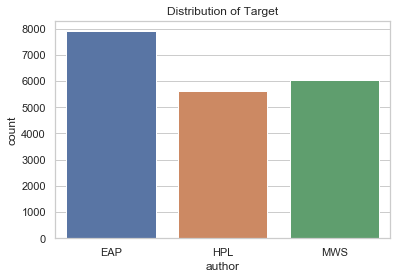

In [42]:
tar_dist = dict(Counter(Y.values))

xx = list(tar_dist.keys())
yy = list(tar_dist.values())

sns.set(style="whitegrid")
ax = sns.barplot(x=xx, y=yy)
ax.set_title('Distribution of Target')
ax.set_ylabel('count');
ax.set_xlabel(_target);

## Step 3: Data Preprocessing

In the data preprocessing step, we will perform label encoding of categorical variables and handle missing values.

### 3.1 Label Encoding
In this step, convert the categorical variables into label encoded forms 

In [15]:
if tag != "text":
    columns = train_df.columns
    num_cols = train_df._get_numeric_data().columns
    cat_cols = list(set(columns) - set(num_cols))

    for col in cat_cols: 
        le = LabelEncoder()
        le.fit(list(train_df[col].values) + list(test_df[col].values))
        train_df[col] = le.transform(list(train_df[col].values))
        test_df[col] = le.transform(list(test_df[col].values))

if Y.dtype.name == "object":
    le = LabelEncoder()
    Y = le.fit_transform(Y.values)

### 3.2 Missing Values Treatment

Handle the missing values, for continuous variables, replace by mean. For categorical variables, replace by mode

In [16]:
if tag != "text":
    ## for numerical columns, replace the missing values by mean
    train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())
    test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].mean())

    ## for categorical columns, replace the missing values by mode
    train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode())
    test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode())

### 3.3 Feature Engineering 

In this section, we will create relevant features which can be used in the modelling

In [22]:
tfidf = TfidfVectorizer(min_df=3,  max_features=None, analyzer='word', 
                        token_pattern=r'\w{1,}', stop_words = 'english')
tfidf.fit(list(train_df[textcol].values))
xtrain =  tfidf.transform(train_df[textcol].values) 
xtest =  tfidf.transform(test_df[textcol].values) 

### 3.4 Train and Validation sets split

Create the training and validation sets for training the model and validating it

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(xtrain, Y, test_size=0.20, random_state=2018)

## Step 4 : Create baseline model

Next step is the modelling step, lets start with the simple linear model 

### 4.1 : Logistic Regression

Train a binary classifier logistic regression

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
valp = model.predict(X_valid)
pred = model.predict(xtest)

### 4.2 : Random Forest Classifier

Now, lets train a tree based model : random forest

In [25]:
model = RandomForestClassifier()
model.fit(X_train, Y)
valp = model.predict(X_valid)
pred = model.predict(xtest)

### 4.3 : xgBoost Classifier

Lets train the extereme gradient boosting : xgboost classifier

In [26]:
model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.01)
model.fit(X_train, Y)
valp = model.predict(X_valid)
pred = model.predict(xtest)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Plots

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

auc = roc_auc_score(y_valid, valp)
print('AUC:', auc)

fpr,tpr,thresholds=roc_curve(y_valid_l, valid_preds_lgb)
roc_auc = metrics.auc(fpr, tpr)

fpr_1,tpr_1,thresholds_1=roc_curve(y_valid_x,xgb_pred_valid)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic for different ML algorithms')
plt.plot(fpr, tpr, 'b', label = 'LGBM-AUC = %0.2f' % roc_auc)
plt.plot(fpr_1, tpr_1, 'g', label = 'XGBoost-AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

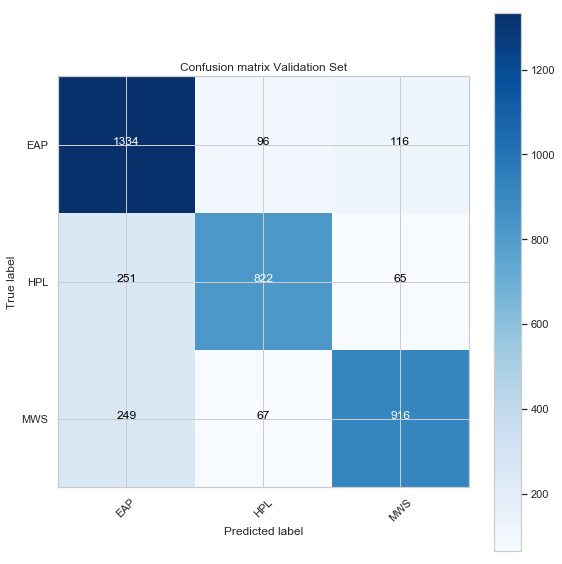

In [57]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
cnf_matrix = confusion_matrix(y_valid, valp)
np.set_printoptions(precision=2)

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'], title='Confusion matrix Validation Set')
plt.show()

## Step 5: Feature Importance

Lets look at some of the important features

<Figure size 1440x1152 with 0 Axes>

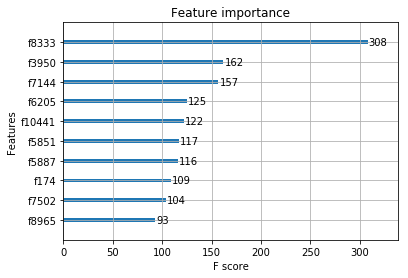

In [29]:
plt.figure(figsize=(20,16));
plot_importance(model, max_num_features=10);

## Step 6 : Create Submission File

Finally, create the submission file from the extereme graident boosting model

In [28]:
sub = pd.DataFrame()
sub[_id] = test_id
sub[_target] = pred
sub.to_csv("baseline_submission.csv", index=False)
sub.head(10)

,id,author
0,id02310,2
1,id24541,0
2,id00134,0
3,id27757,0
4,id04081,0
5,id27337,0
6,id24265,0
7,id25917,0
8,id04951,0
9,id14549,0


In [ ]:
## exploration of data 
## feature engineering 
## model tuning - grid searching 
## model ensembling 

## Visualize correlation
## visualize missing values 
## K cross validation